# SALES ANALYSIS TO FIND THE POTENTIAL CUSTOMERS ( TO FIND A TARGET CUSTOMER )

## IMPORTING LIBRARIES

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

## OUR FILE HAS DIFFERENT ENCODING hence changing it to encoding='latin1'

In [4]:
import pandas as pd

# Trying reading the file with a different encoding, such as 'latin1'
try:
    df = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')
except DecodeError:
    print("Error: Unable to decode the file with 'latin1' encoding. Try another encoding.")
    



(11251, 15)

# Data cleaning

In [118]:
#show no. of rows and column
df.shape

(11239, 13)

In [6]:
#show 1st 5 rown
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
#to show data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#to show numeric data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


## DATA FILTERING

#to delete unwanted columns

In [10]:

df = df.drop(columns = ['Status','unnamed1'])
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


#to see null values

In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## (Delete null values)

In [15]:
df.dropna(inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


# DATA ANALYSIS(VISUALIZATION)

## PLOTING BAR GRAPH FOR relation between GENDER and TOTAL SALES

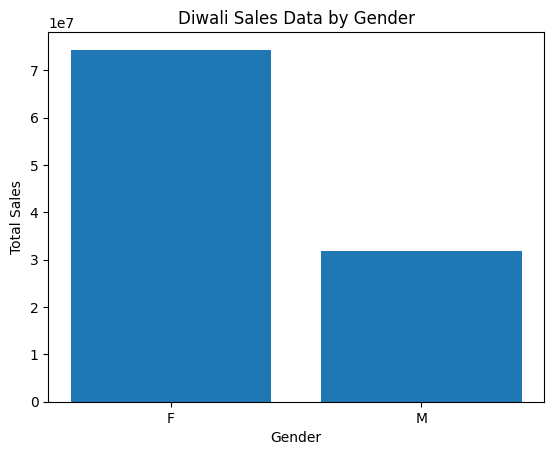

In [19]:
#grouping the values to be compaired
grouped_data = df.groupby('Gender')['Amount'].sum()

#making a bar graph from mitplotlib.pyplot
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Diwali Sales Data by Gender')
plt.show()

### CONCLUSION : FEMALE ARE THE POTENTIAL CUSTOMERS

# PLOTING HISTOGRAM FOR relation between AGE GROUP and TOTAL SALES

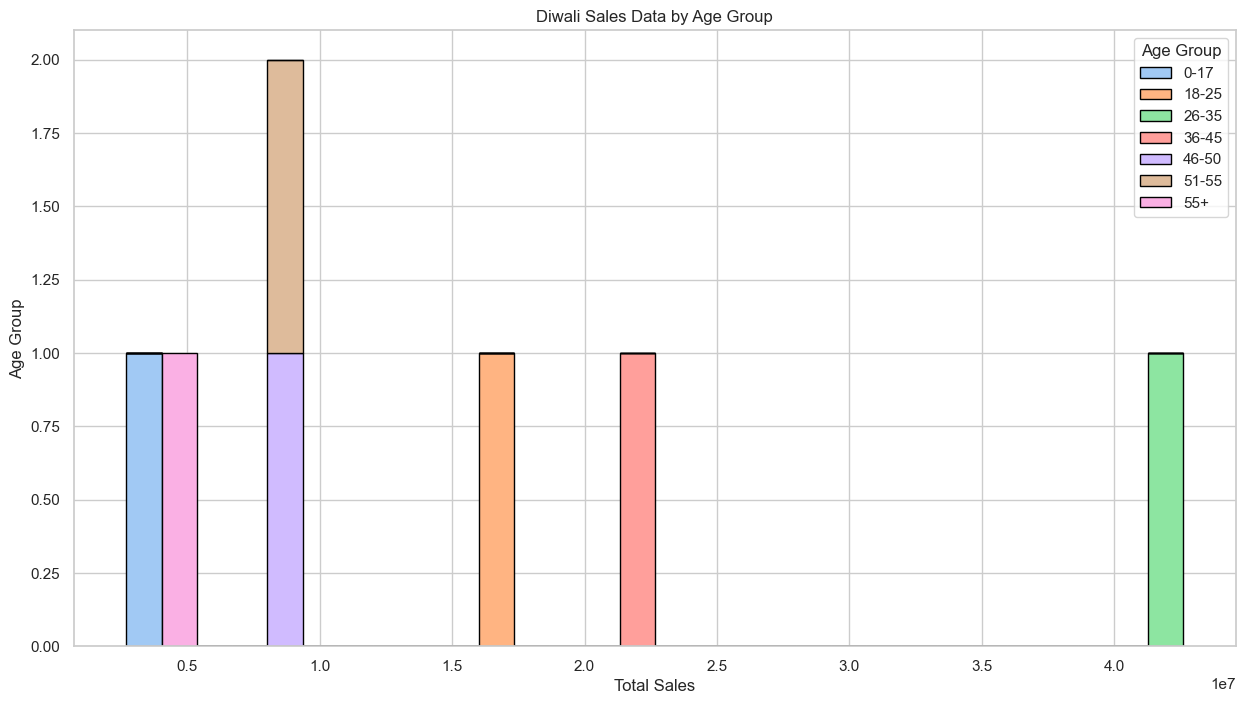

In [79]:
#grouping the values to be compaired
grouped_data1 = df.groupby('Age Group')['Amount'].sum().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram using Matplotlib with a custom color for each 'Age Group'
plt.figure(figsize=(15, 8))
colors = sns.color_palette('pastel', n_colors=len(grouped_data1['Age Group']))
plt.hist([grouped_data1[grouped_data1['Age Group'] == age_group]['Amount'] for age_group in grouped_data1['Age Group']],
         bins=30, stacked=True, color=colors, edgecolor='black', label=grouped_data1['Age Group'])
plt.xlabel('Total Sales')
plt.ylabel('Age Group')
plt.title('Diwali Sales Data by Age Group')

# Adding legend
plt.legend(title='Age Group')

plt.show()

## CONCLUSION : TARGET AUDIANCE AGE =26-35

# PLOTING BAR GRAPH FOR relation between STATE and TOTAL SALES

C:\Users\Atharva\AppData\Local\Temp\ipykernel_3900\1019813736.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Amount', data=grouped_data, palette='pastel')


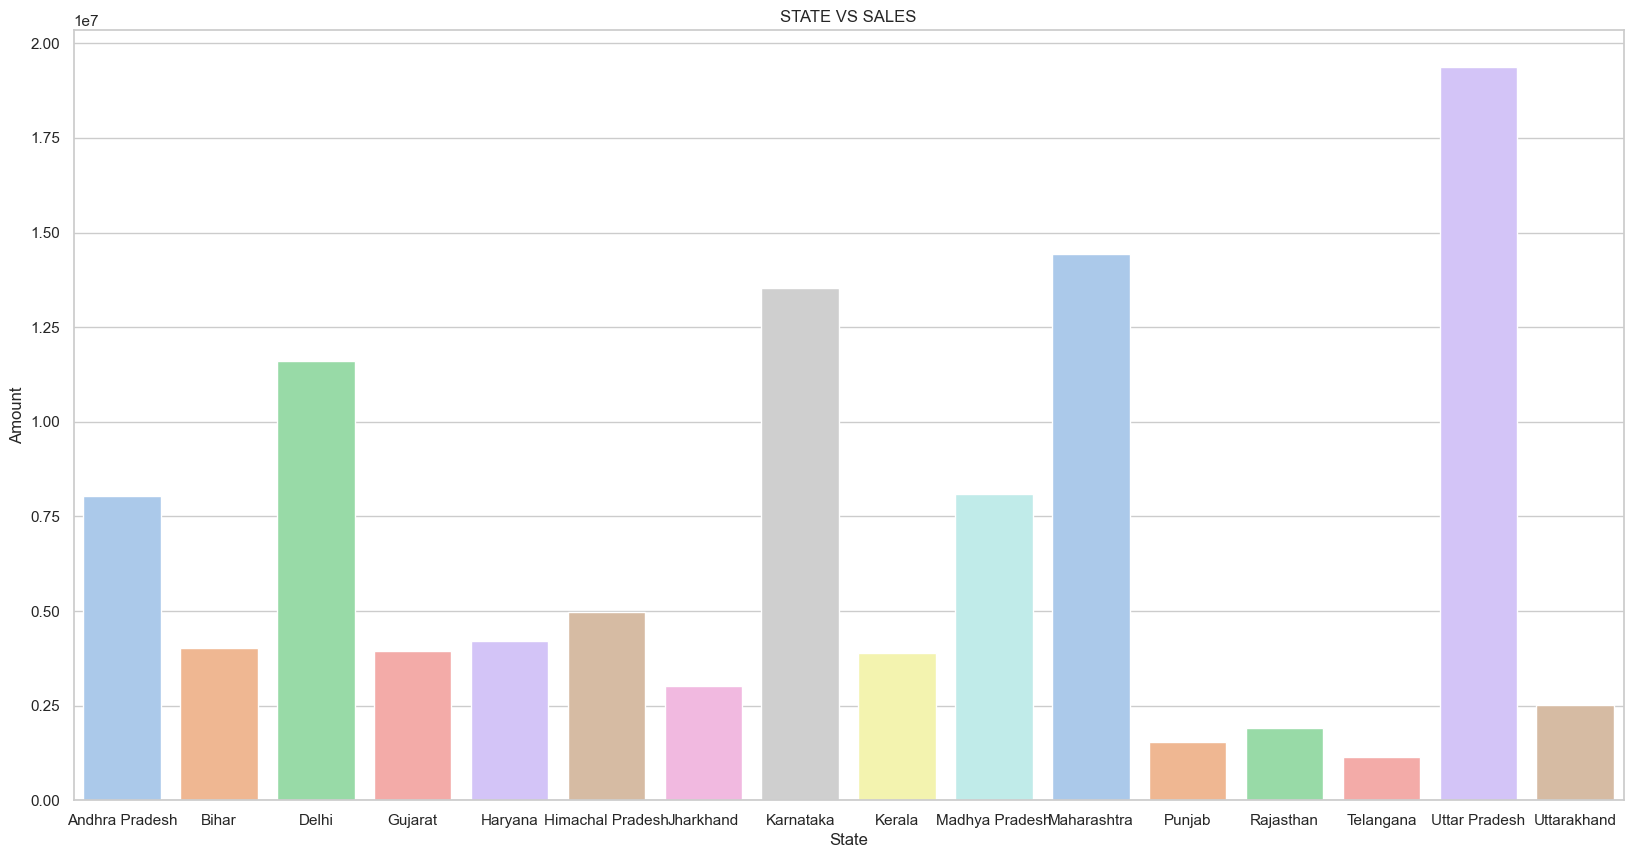

In [82]:
#grouping the values to be compaired
grouped_data = df.groupby('State')['Amount'].sum().reset_index()

# Set Seaborn style
sns.set(style='whitegrid')

# Create a bar plot using Seaborn
plt.figure(figsize=(20,10))
sns.barplot(x='State', y='Amount', data=grouped_data, palette='pastel')
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('STATE VS SALES')

plt.show()

## CONCLUSION :UTTER PRADESH, MAHARASHTRA , KARNATAKA AND DELHI HAS THE BIGGEST MARKET

# PLOTING PIECHART for AGE GROUP AND TOTAL SALES

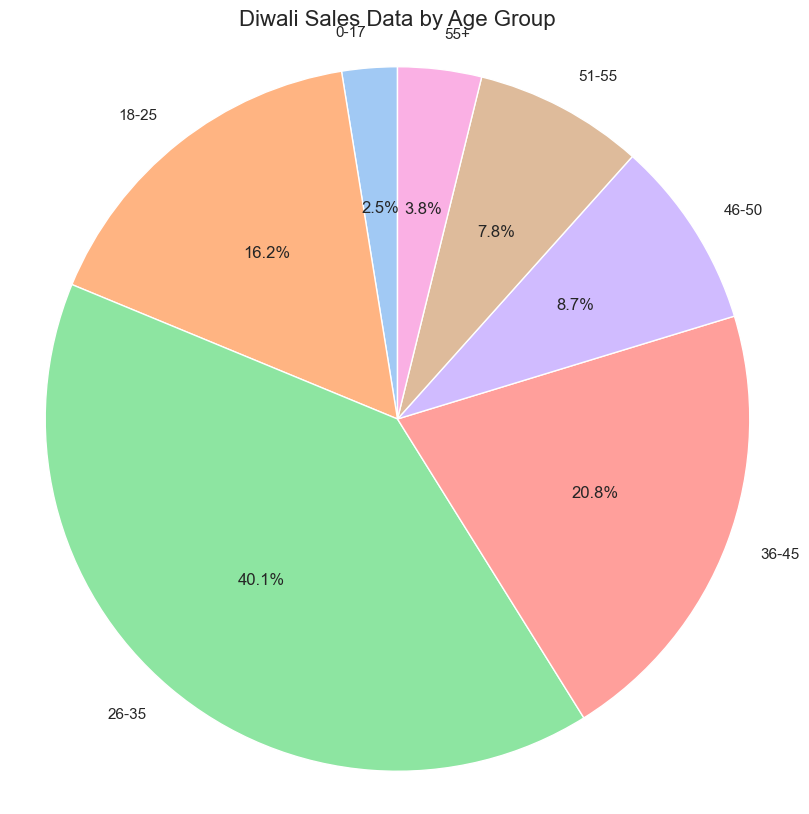

In [52]:
#grouping age and amount spent
grouped_data_age = df.groupby('Age Group')['Amount'].sum().reset_index()

# Setting a custom Seaborn color palette
colors = sns.color_palette("pastel")

# Setting the Seaborn style
sns.set(style="whitegrid")

# Creating a pie chart using Seaborn
plt.figure(figsize=(10, 10))
plt.pie(grouped_data_age['Amount'], labels=grouped_data_age['Age Group'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')            # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diwali Sales Data by Age Group', fontsize=16)
 
plt.show()

## CONCLUSION : TARGET AUDIANCE AGE =26-35

# PLOTING BAR GRAPH FOR relation between OCCUPATION and TOTAL SALES


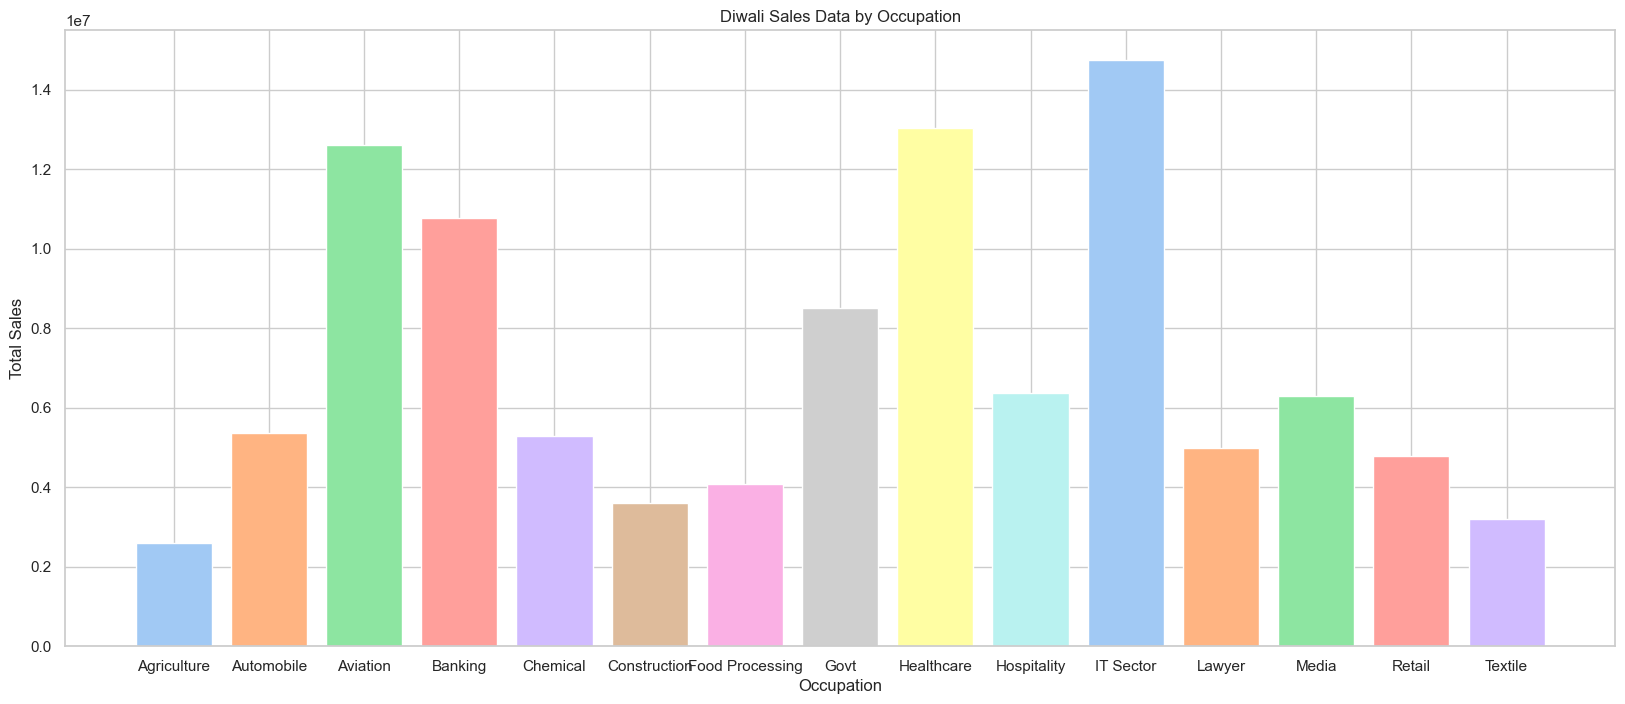

In [55]:
#specifiying the colour style
colors = sns.color_palette("pastel")

#grouping the required values
grouped_data2 = df.groupby('Occupation')['Amount'].sum()

# Making a bar graph using matplotlib.pyplot
plt.figure(figsize=(20, 8))  # Adjust the figure size according to your preference
plt.bar(grouped_data2.index, grouped_data2, color=colors)
plt.xlabel('Occupation')
plt.ylabel('Total Sales')
plt.title('Diwali Sales Data by Occupation')  # Changed the title to make more sense
plt.show()

## CONCLUSION: TOP 5 OPPUPATIONS OF THE CLIENTS ARE 
"1.IT SECTOR"   "2.HEALTH CARE"    "3.AVIATION"    "4.BANKING"    "5.GOVERNMENT OCCUPATIONS"

# CREATING A AREA PLOT FOR PRODUCT TYPE , STATE AND SALES

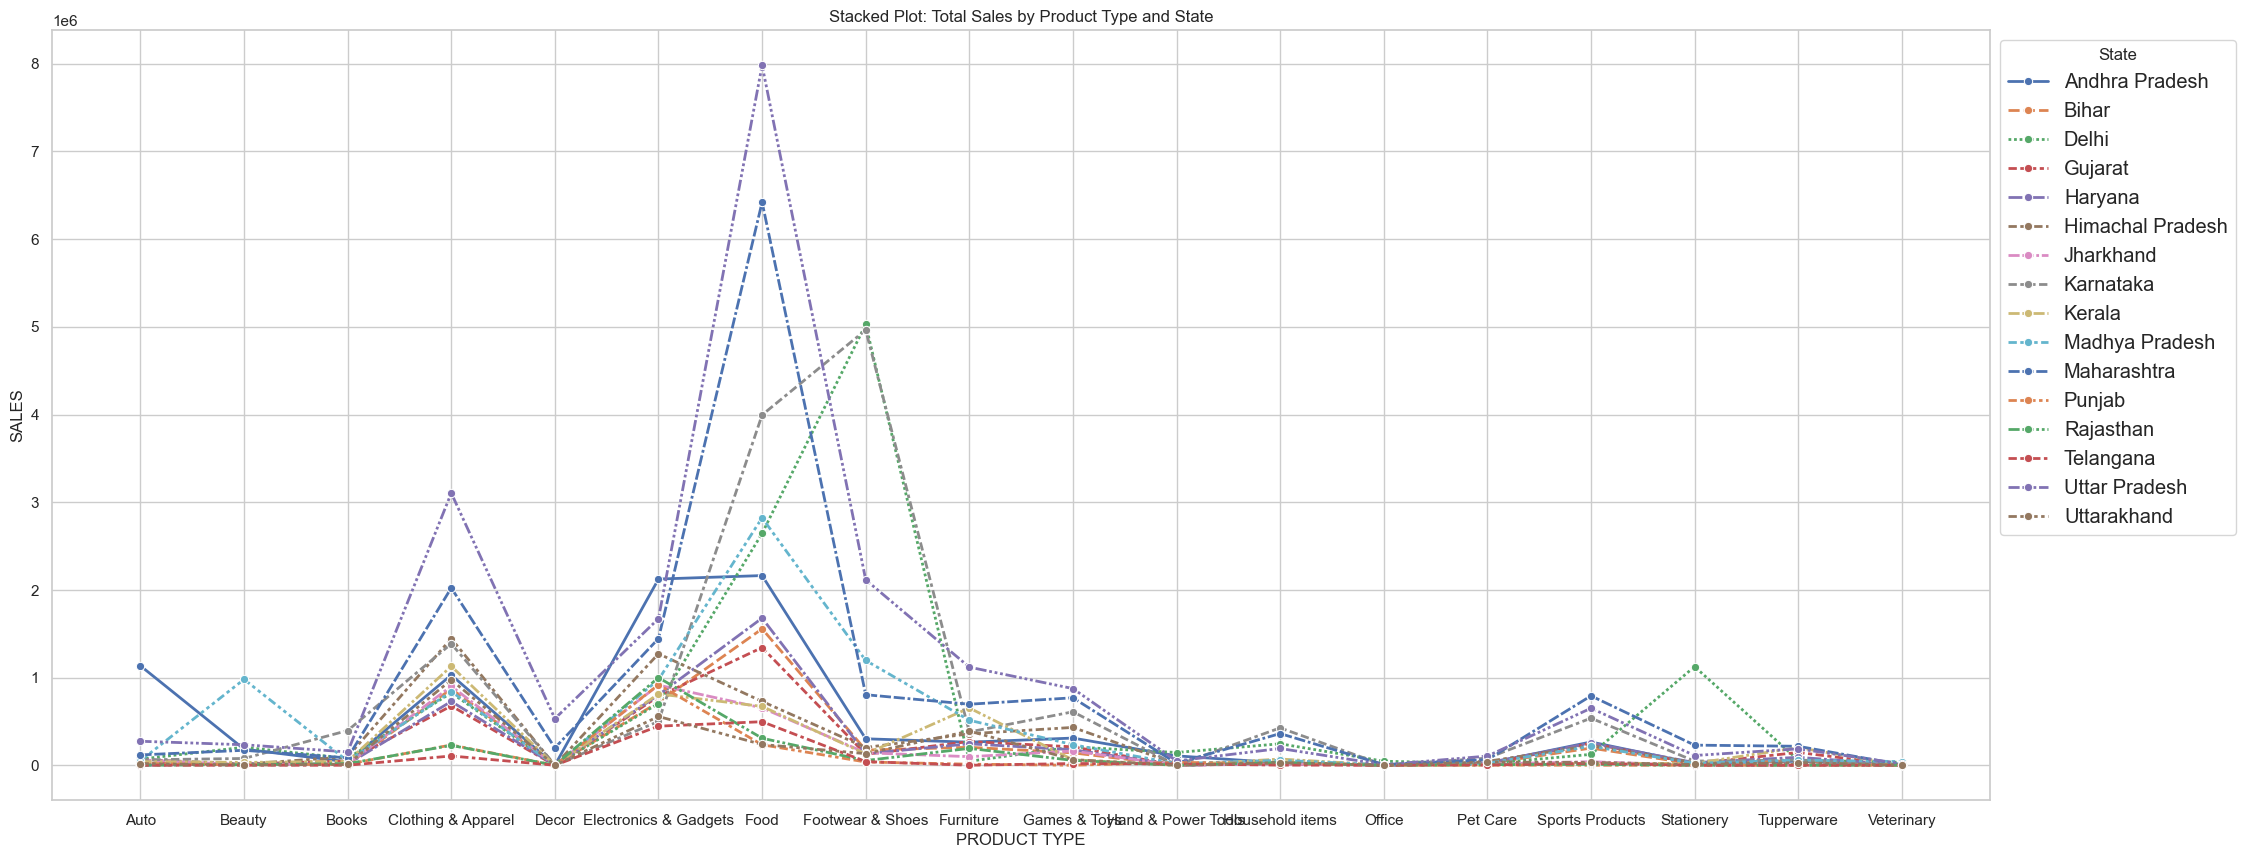

In [122]:
# Assuming you have a DataFrame named 'df' with columns 'State', 'Product_Type', and 'Amount'

grouped_data = df.groupby(['State', 'Product_Category'])['Amount'].sum().unstack().fillna(0)

# Set Seaborn style
sns.set(style='whitegrid')

# Create a stacked area plot using Seaborn
plt.figure(figsize=(25, 10))
sns.lineplot(data=grouped_data.T, sort=False, lw=2, palette='deep', marker='o')

plt.xlabel('PRODUCT TYPE')
plt.ylabel('SALES')
plt.title('Stacked Plot: Total Sales by Product Type and State')
plt.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left',fontsize='large')

plt.show()


## NOTE : WE CAN MAKE A AI MODEL WHICH WILL STUDY THE ABOVE GRAPH AND TELL , WHICH PRODUCT IS BUYED MOST IN WHICH STATE

# MAKING A SUBPLOTS FOR AGE , STATE OCCUPATION AND PRODUCT CATEGORY

C:\Users\Atharva\AppData\Local\Temp\ipykernel_3900\244590394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Amount', data=df, ax=axes[0, 1], palette='deep')
C:\Users\Atharva\AppData\Local\Temp\ipykernel_3900\244590394.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Amount', data=df, ax=axes[1, 0], palette='deep')
C:\Users\Atharva\AppData\Local\Temp\ipykernel_3900\244590394.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Amount', data=df, ax=axes[1, 1], palette='deep')


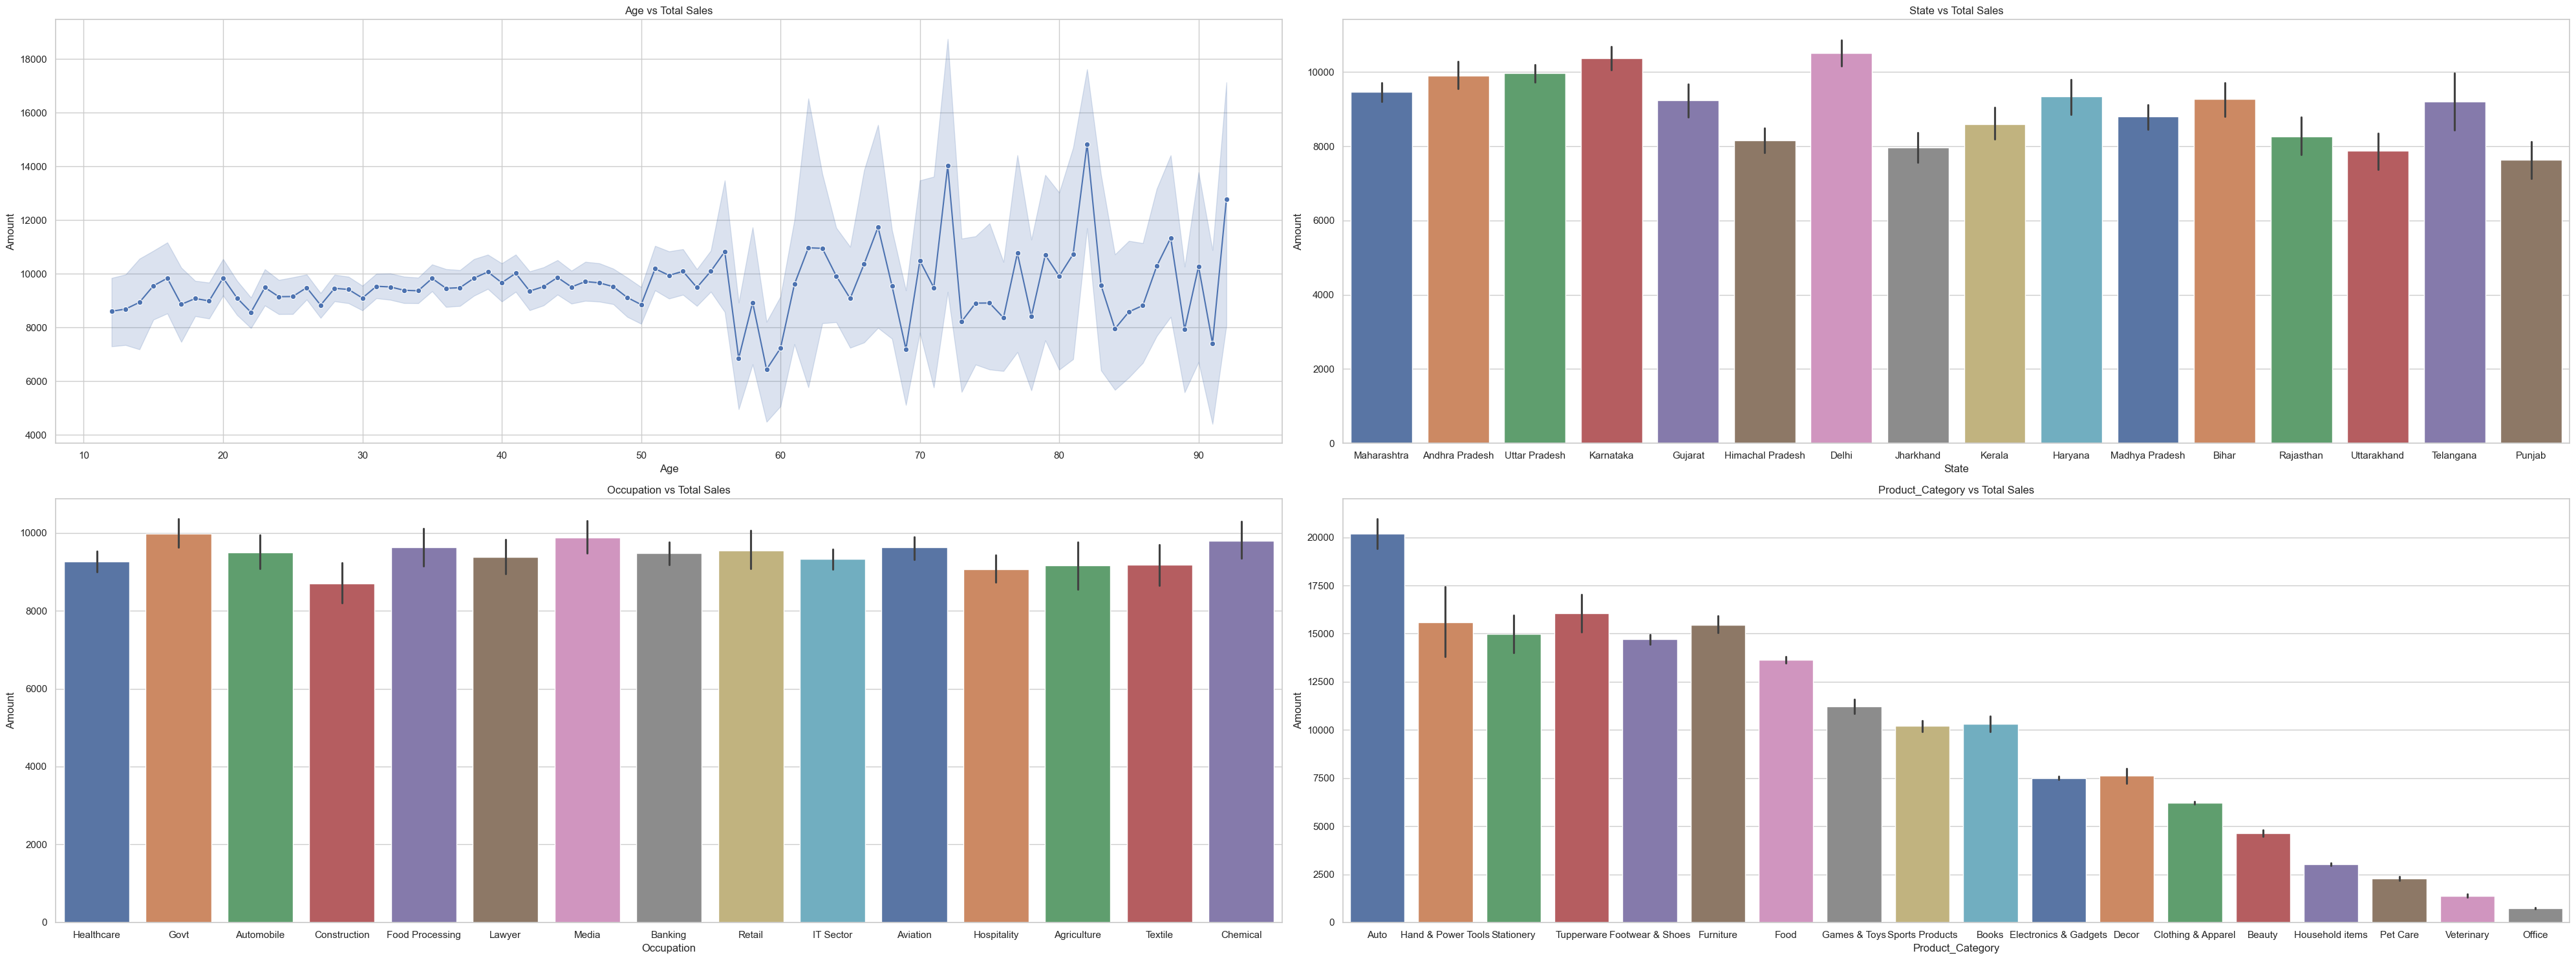

In [111]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 15))

# Subplot 1: Age vs Total Sales
sns.lineplot(x='Age', y='Amount', data=df, ax=axes[0, 0], marker='o')
axes[0, 0].set_title('Age vs Total Sales')

# Subplot 2: State vs Total Sales
sns.barplot(x='State', y='Amount', data=df, ax=axes[0, 1], palette='deep')
axes[0, 1].set_title('State vs Total Sales')

# Subplot 3: Occupation vs Total Sales
sns.barplot(x='Occupation', y='Amount', data=df, ax=axes[1, 0], palette='deep')
axes[1, 0].set_title('Occupation vs Total Sales')

# Subplot 4: Product_Category vs Total Sales
sns.barplot(x='Product_Category', y='Amount', data=df, ax=axes[1, 1], palette='deep')
axes[1, 1].set_title('Product_Category vs Total Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# MAKING A SUBPLOTS FOR AGE , STATE OCCUPATION AND PRODUCT CATEGORY¶

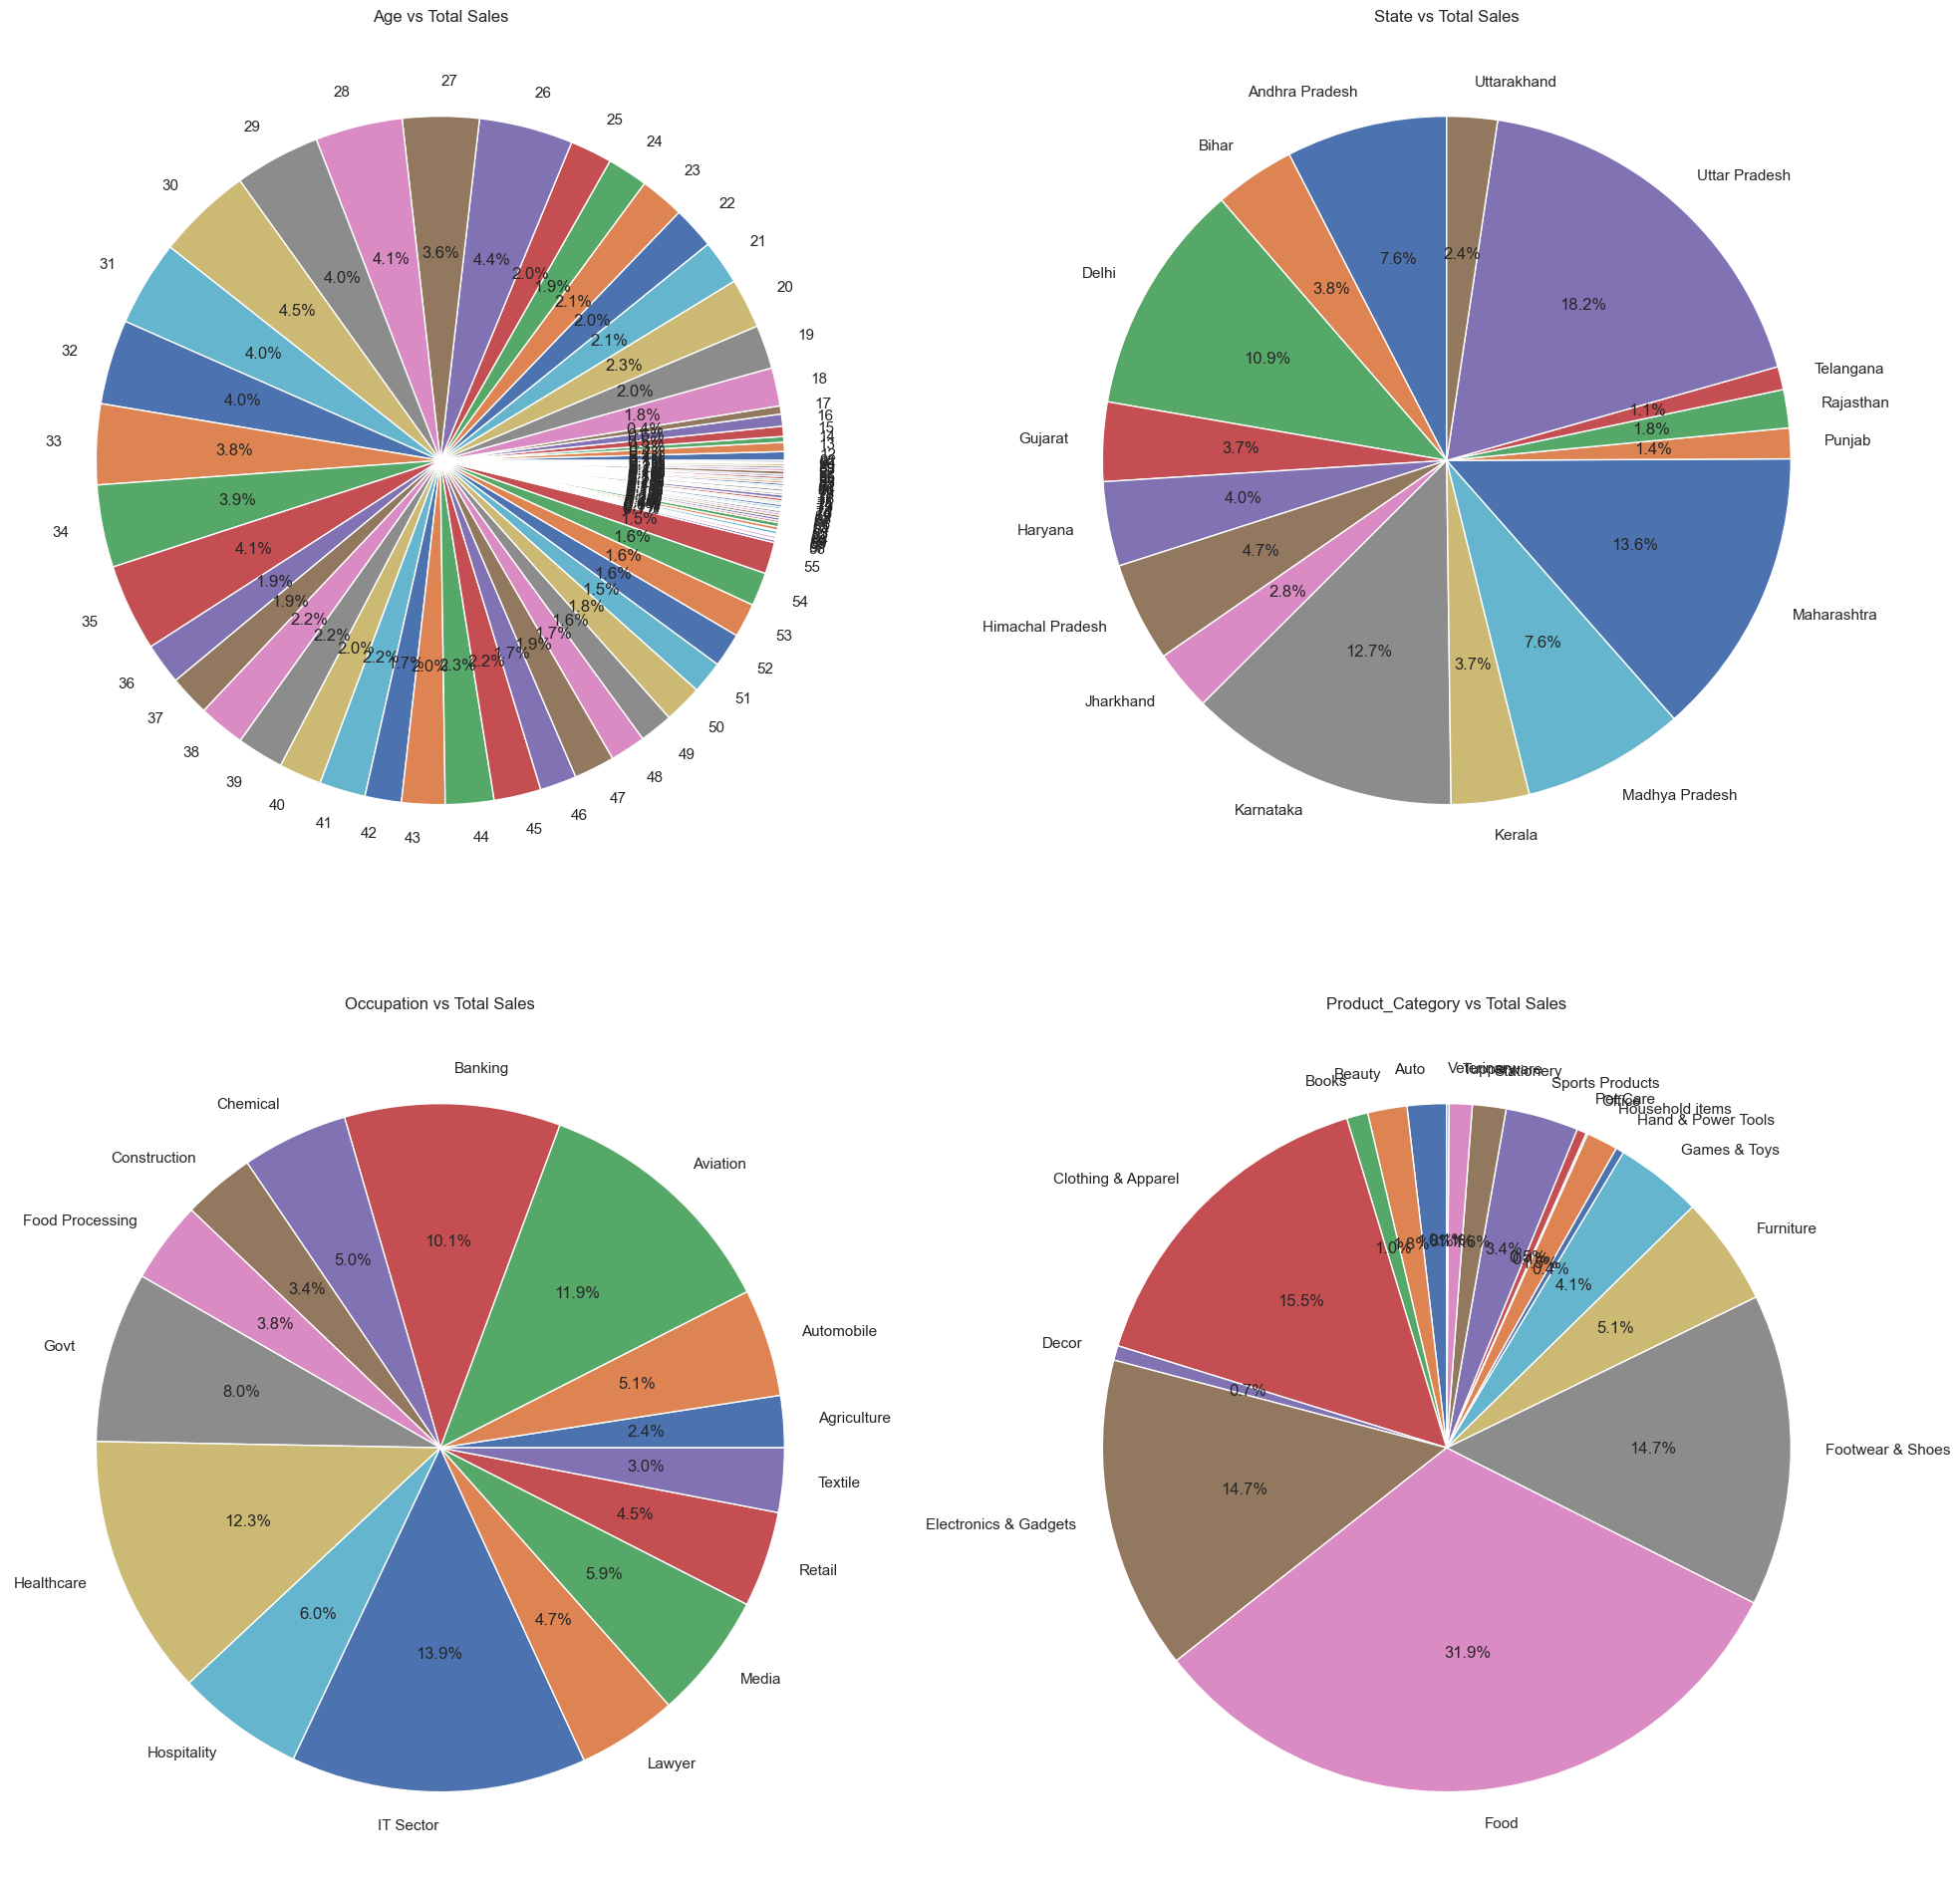

In [117]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Subplot 1: Age vs Total Sales
age_total_sales = df.groupby('Age')['Amount'].sum()
axes[0, 0].pie(age_total_sales, labels=age_total_sales.index, autopct='%1.1f%%')
axes[0, 0].set_title('Age vs Total Sales')

# Subplot 2: State vs Total Sales
state_total_sales = df.groupby('State')['Amount'].sum()
axes[0, 1].pie(state_total_sales, labels=state_total_sales.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('State vs Total Sales')

# Subplot 3: Occupation vs Total Sales
occupation_total_sales = df.groupby('Occupation')['Amount'].sum()
axes[1, 0].pie(occupation_total_sales, labels=occupation_total_sales.index, autopct='%1.1f%%')
axes[1, 0].set_title('Occupation vs Total Sales')

# Subplot 4: Product_Category vs Total Sales
product_category_total_sales = df.groupby('Product_Category')['Amount'].sum()
axes[1, 1].pie(product_category_total_sales, labels=product_category_total_sales.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Product_Category vs Total Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# CONCLUSION : 

```python
1)TARGET AUDIENCE AGE (26-35) 
2) TOP 5 OPPUPATIONS OF THE CLIENTS ARE¶  "1.IT SECTOR" "2.HEALTH CARE" "3.AVIATION" "4.BANKING" "5.GOVERNMENT OCCUPATIONS  
3) UTTER PRADESH, MAHARASHTRA , KARNATAKA AND DELHI HAS THE BIGGEST MARKET 
4)FEMALE ARE THE POTENTIAL CUSTOMERS"
```

# NOW WE CAN EFFICIENTLY CONTINUE OUR ADVERTISEMENT TO OUR POTENTIAL CUSTOMER WHICH WHILL DECREASE THE WRONG MARKETING AND INCREASE THE EFFICIENCY OF TARGET MARKETING